In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Introduction

Churn is a problem that afflicts every company. Building a model that accurately predicts churn will be an aid to any company’s bottom line. Not only will I build a model that accurately predicts churn, but I describe how the model can be implemented and propose a customer retention strategy.

The data for this problem comes from Kaggle,https://www.kaggle.com/blastchar/telco-customer-churn .
 

In [2]:
data = pd.read_csv('customerchurn.csv')

# Exploration

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#quickly adjust MonthlyCharges to ensure it has the correct data type and values
data['TotalCharges'] = data.MonthlyCharges * data.tenure

Almost all features in the dataset are categorical. The only features that are not categorical are tenure, monthly charges, and total charges, which are all ratio data.

__Churn__

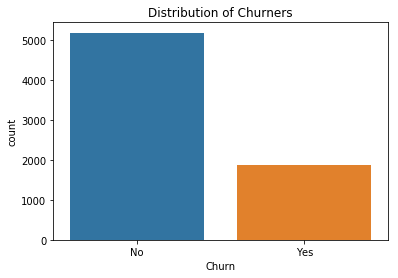

In [7]:
plt.title('Distribution of Churners')
sns.countplot(data.Churn).set(xticklabels=['No','Yes'])
plt.show();

__Customer Demographics__

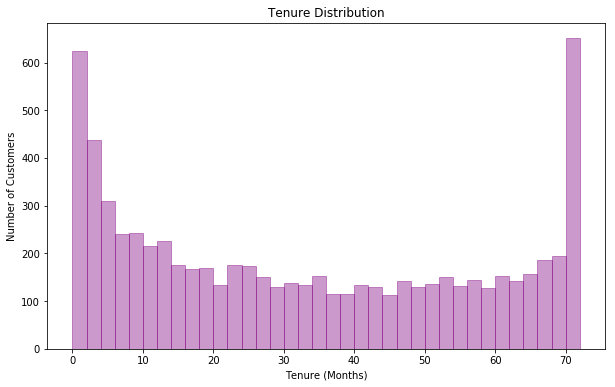

The average customer tenure is 32.37 months.


In [8]:
plt.figure(figsize=(10,6))
#plt.hist(data.tenure)
sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'purple'})

plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show();
print('The average customer tenure is %0.2f months.'% (data.tenure.mean()))

It appears that a lot of churn happens within the first 10 months of the customer relationship. After that, the number of customers remains roughly stable.

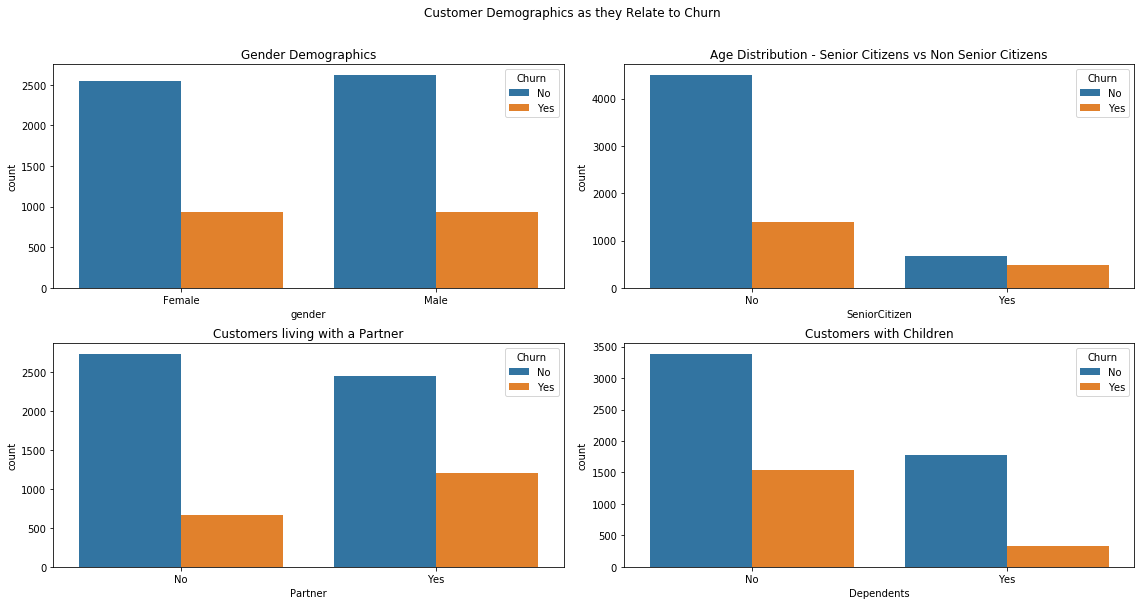

In [9]:
plt.figure(figsize=(16,16))
plt.suptitle('Customer Demographics as they Relate to Churn')
plt.subplot(4, 2, 1)
plt.title('Gender Demographics')
sns.countplot(data.gender,hue=data.Churn).set(xticklabels=['Female','Male'])
plt.subplot(4, 2, 2)
plt.title('Age Distribution - Senior Citizens vs Non Senior Citizens')
sns.countplot(data.SeniorCitizen, hue=data.Churn).set(xticklabels=['No','Yes'])
plt.subplot(4, 2, 3)
plt.title('Customers living with a Partner')
sns.countplot(data.Partner, hue=data.Churn).set(xticklabels=['No','Yes'])
plt.subplot(4, 2, 4)
plt.title('Customers with Children')
sns.countplot(data.Dependents,hue=data.Churn).set(xticklabels=['No','Yes'])

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show();

From the above graphs we can deduce that gender plays no role in custome churn. However, living with a partner and/or living with children does have an impact churn. Both customers cohabitating with a partner and customers who have children in the household are less likely to end their customer relationship. Unsurprisingly, age seems to play a factor as well with a greater proportion of elderly customers ending their customer relationship.

__Product Demographics__

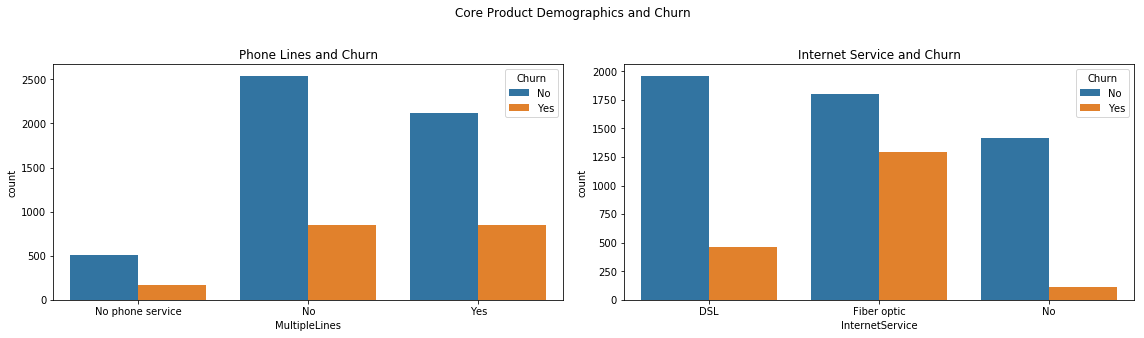

In [10]:
plt.figure(figsize=(16,16))
plt.suptitle('Core Product Demographics and Churn')

plt.subplot(4, 2, 1)
plt.title('Phone Lines and Churn')
sns.countplot(data['MultipleLines'], hue=data.Churn)

plt.subplot(4, 2, 2)
plt.title('Internet Service and Churn')
sns.countplot(data['InternetService'], hue=data.Churn)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show();

Telecom companies offer two main products - phone service and internet service. What we can see in the graphs above is that phone service plays little to no role in customer churn. In fact, it doesn't matter how many phone lines a customer has.

Internet service however, plays a large role in customer churn. The type of internet service a customer has matters as well; DSL customers a much less likely to end their relationship than those with fiber optic. Further, customers without internet all together are less likely to end their relationship.

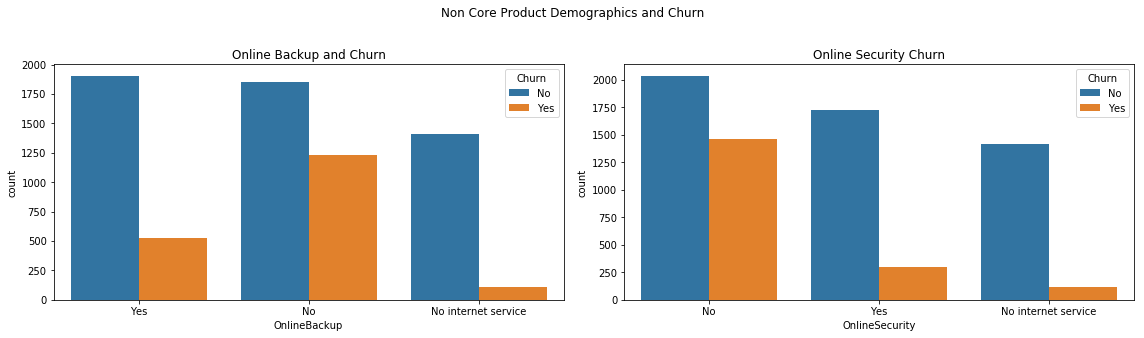

In [11]:
plt.figure(figsize=(16,16))
plt.suptitle('Non Core Product Demographics and Churn')

plt.subplot(4, 2, 1)
plt.title('Online Backup and Churn')
sns.countplot(data['OnlineBackup'], hue=data.Churn)

plt.subplot(4, 2, 2)
plt.title('Online Security Churn')
sns.countplot(data['OnlineSecurity'], hue=data.Churn)


plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show();

Non-core products, or value added services, are services that are not part of a telecom company's core product offering (phone and internet);there are 5 in the dataset. Two in particular, Online Backup and Online Security are strong indicators of customer churn. Customers who choose not to add online security or online backups have a much higher churn ratio than customers who opt in for those services. This indicates that the value added services are very sticky.

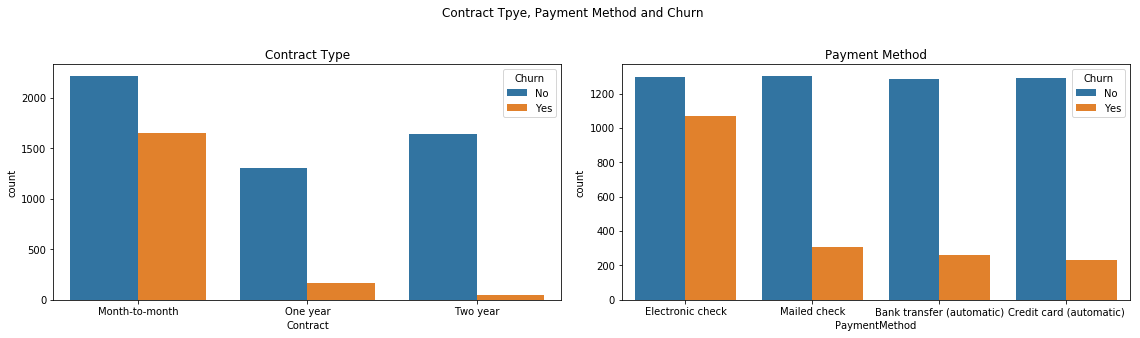

In [12]:
plt.figure(figsize=(16,16))
plt.suptitle('Contract Tpye, Payment Method and Churn')

plt.subplot(4, 2, 1)
plt.title('Contract Type')
sns.countplot(data['Contract'], hue=data.Churn)

plt.subplot(4, 2, 2)
plt.title('Payment Method')
sns.countplot(data['PaymentMethod'], hue=data.Churn)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show();

The disitribution of contract types comes of little surprise. So to does the churn ratio for each contract type. The surprise comes in the form of payment method as the churn ratio for phyisical checks is very low but electronic check (attached checking account) is very high.

# Feature Engineering and Selection


__Feature Engineering__

In [13]:
#customer ID isn't needed for this analysis
data.drop('customerID', 1, inplace=True)

In [14]:
#change all the binary catagorical var to numerical
binary_vars = {"gender": {"Male": 1, "Female": 0},
               "Partner": {"Yes": 1, "No": 0},
               "Dependents": {"Yes": 1, "No": 0},
               "Churn": {"Yes":1, "No":0},
               "PaperlessBilling": {"Yes":1, "No":0},
               "PhoneService": {"Yes":1, "No":0}}

data.replace(binary_vars, inplace=True)

In [15]:
#one-hot encoding
df = pd.get_dummies(data)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1936.30,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,107.70,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1903.50,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,141.40,1,...,1,0,0,1,0,0,0,0,1,0


There are 5 value added services in the data. In order to capture capture their importance I created a variable to indicate whether or not they are significant. I set a threshhold of 3 products to indicate whether or not a customer was taking advantage of the value added services. In otherwords, if a customer is has any combination of 3 or more of Online Backups, Online Security, Streaming TV, Streaming Movies or Device Protection then they are considered to be taking advantage of value added services. 

In [16]:
#create a feature that indicates 
#a customer has 3 or more value added services
df['ValueAdd'] = np.where((((df.DeviceProtection_Yes)+(df.OnlineSecurity_Yes)+(df.OnlineBackup_Yes)+(df.StreamingTV_Yes)+(df.StreamingMovies_Yes) >= 3)),1,0)

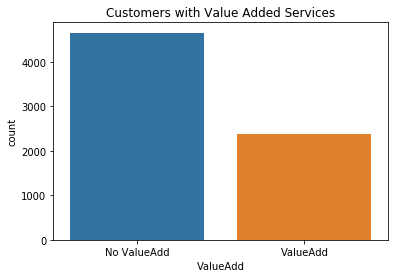

In [17]:
#visualize how many customers have value added services
sns.countplot(df.ValueAdd).set(xticklabels=['No ValueAdd','ValueAdd'])
plt.title('Customers with Value Added Services')
plt.show();

Just over a third of customers take advantage of the value added services.

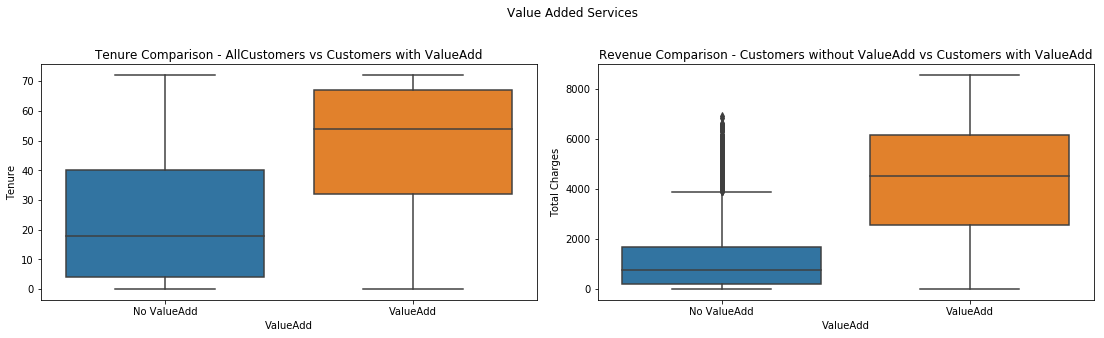

In [18]:
plt.figure(figsize=(16,16))
plt.suptitle('Value Added Services')

plt.subplot(4,2,1)
plt.title('Tenure Comparison - AllCustomers vs Customers with ValueAdd')
sns.boxplot(x="ValueAdd", y="tenure", data=df).set(xticklabels=['No ValueAdd','ValueAdd'])
#plt.boxplot([df.tenure,df.loc[df['ValueAdd']==1].tenure], labels=['AllCustomers','ValueAdd'])
plt.ylabel('Tenure')

plt.subplot(4,2,2)
plt.title('Revenue Comparison - Customers without ValueAdd vs Customers with ValueAdd')
sns.boxplot(x="ValueAdd", y="TotalCharges", data=df).set(xticklabels=['No ValueAdd','ValueAdd'])
#plt.boxplot([df.TotalCharges,df.loc[df['ValueAdd']==1].TotalCharges], labels=['AllCustomers','ValueAdd'])
plt.ylabel('Total Charges')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show();

The above graphs indicate that customers who opt in for the value added services (3 or more) stay with the company longer on average than other customers; roughly 10 months to be exact. That directly impacts the revenue generated by the company. As we can see in the graph on the right, customers who opt in to value added services generate vastly more revenue for the company than the average customer. 

__Feature Selection__

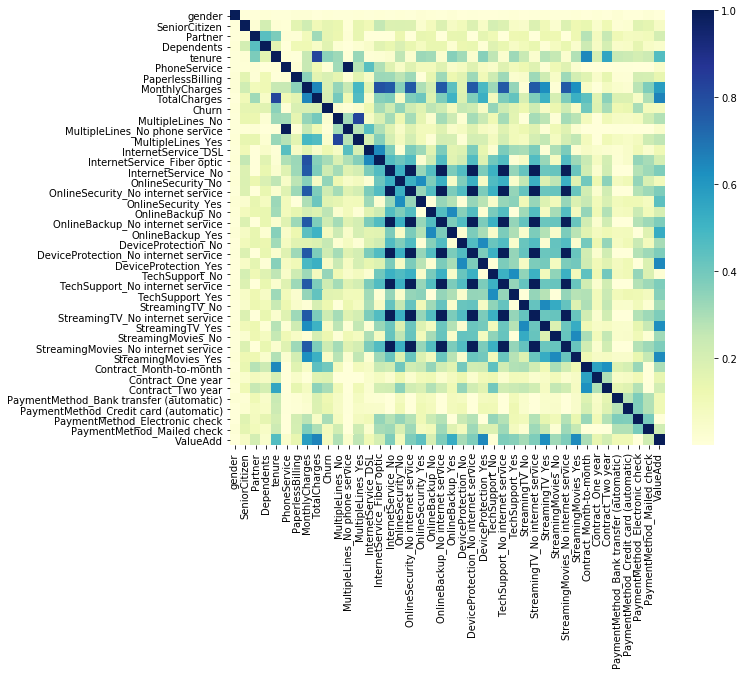

In [19]:
#visualize feature correlations
#use the absolute value of the coefficients
corrmat = df.corr().abs()

plt.figure(figsize=(10,8))
sns.heatmap(corrmat, square=True,cmap="YlGnBu")
plt.show();

In [20]:
#drop all unecessary features
df.drop(['OnlineSecurity_No internet service','OnlineBackup_No internet service',
         'DeviceProtection_No internet service','TechSupport_No internet service',
         'StreamingTV_No internet service', 'StreamingMovies_No internet service'],1, inplace=True)

# Models

In [21]:
X = df.drop(['Churn','TotalCharges'],1)
Y = df.Churn

#load cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as ttsplit

x_train,x_test,y_train,y_test = ttsplit(X,Y,test_size=0.3, random_state=50)

__Logistic Regression__

In [22]:
start_time = datetime.now()

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#train the model
lr.fit(x_train,y_train)

#establish predictions
lr_pred = lr.predict(x_test)

print('Accuracy on Full Data Set: %0.3f'% (lr.fit(X,Y).score(X,Y)))

#cross validate accuracy
lr_score = cross_val_score(lr,X,Y,cv=10)
display(lr_score)

print('Average Accuracy: %0.3f (+/- %0.3f)' % (lr_score.mean(),lr_score.std()*2))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy on Full Data Set: 0.805


array([0.79148936, 0.81702128, 0.80141844, 0.82269504, 0.78693182,
       0.79545455, 0.80823864, 0.80255682, 0.79545455, 0.80654339])

Average Accuracy: 0.803 (+/- 0.021)
Duration: 0:00:00.412292


__Random Forest__

In [23]:
start_time = datetime.now()
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=10)

#fit the model
rfc.fit(x_train,y_train)


#establish predictions
rfc_pred = rfc.predict(x_test)

print('Accuracy on Full Data Set: %0.3f'% (rfc.fit(X,Y).score(X,Y)))

#cross validate accuracy
rfc_score = cross_val_score(rfc,X,Y,cv=10)
display(rfc_score)

print('Average Accuracy: %0.3f (+/- %0.3f)' % (rfc_score.mean(),rfc_score.std()*2))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy on Full Data Set: 0.862


array([0.80283688, 0.80425532, 0.8       , 0.80567376, 0.78125   ,
       0.77414773, 0.81392045, 0.79829545, 0.79971591, 0.80938834])

Average Accuracy: 0.799 (+/- 0.023)
Duration: 0:00:05.416310


__Neural Network (Multilayered Perceptron Network)__

In [24]:
start_time = datetime.now()
from sklearn.neural_network import MLPClassifier

# Establish the model with one 100 perceptron layer layer.
mlp = MLPClassifier(hidden_layer_sizes=(100,5))

#fit the model
mlp.fit(x_train, y_train)

#establish predictions
mlp_pred = mlp.predict(x_test)


print('Accuracy on Full Data Seet: {}'.format(mlp.fit(X,Y).score(X,Y)))

#cross validate accuracy
mlp_score = cross_val_score(mlp,X,Y,cv=10)
display(mlp_score)

print('Average Accuracy: %0.3f (+/- %0.3f)' % (mlp_score.mean(),mlp_score.std()*2))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy on Full Data Seet: 0.8107340621894079


array([0.8       , 0.81985816, 0.80425532, 0.8070922 , 0.796875  ,
       0.734375  , 0.81676136, 0.79261364, 0.796875  , 0.80654339])

Average Accuracy: 0.798 (+/- 0.045)
Duration: 0:00:10.369738


## Model Evaluation

__Logistic Regression__

In [25]:
lr_table = pd.crosstab(y_test,lr_pred, margins=True)
lr_table

col_0,0,1,All
Churn,,,
0,1370,186,1556
1,239,318,557
All,1609,504,2113


In [26]:
sensitivity = lr_table.loc[0.0,0.0] / (lr_table.loc[0.0,0.0] + lr_table.loc[0.0,1.0])
specificity = lr_table.loc[1.0,1.0] / (lr_table.loc[1.0,0.0] + lr_table.loc[1.0,1.0])
T1 = lr_table.loc[0.0,1.0]/lr_table.loc['All','All']
T2 = lr_table.loc[1.0,0.0]/lr_table.loc['All','All']

print('Sensitivity: {}'.format(sensitivity))
print('Specificity: {}'.format(specificity))
print('T1 Error Rate: {}'.format(T1))
print('T2 Error Rate: {}'.format(T2))

Sensitivity: 0.8804627249357326
Specificity: 0.5709156193895871
T1 Error Rate: 0.08802650260293422
T2 Error Rate: 0.11310932323710364


__Random Forest__

In [27]:
rfc_table = pd.crosstab(y_test,rfc_pred, margins=True)
display(rfc_table)

col_0,0,1,All
Churn,,,
0,1385,171,1556
1,263,294,557
All,1648,465,2113


In [28]:
sensitivity = rfc_table.loc[0.0,0.0] / (rfc_table.loc[0.0,0.0] + rfc_table.loc[0.0,1.0])
specificity = rfc_table.loc[1.0,1.0] / (rfc_table.loc[1.0,0.0] + rfc_table.loc[1.0,1.0])
T1 = rfc_table.loc[0.0,1.0]/rfc_table.loc['All','All']
T2 = rfc_table.loc[1.0,0.0]/rfc_table.loc['All','All']

print('Sensitivity: {}'.format(sensitivity))
print('Specificity: {}'.format(specificity))
print('T1 Error Rate: {}'.format(T1))
print('T2 Error Rate: {}'.format(T2))

Sensitivity: 0.8901028277634961
Specificity: 0.5278276481149012
T1 Error Rate: 0.08092759110269758
T2 Error Rate: 0.12446758163748226


__MLP__

In [29]:
mlp_table = pd.crosstab(y_test, mlp_pred, margins=True)
display(mlp_table)

col_0,0,1,All
Churn,,,
0,1442,114,1556
1,313,244,557
All,1755,358,2113


In [30]:
sensitivity = mlp_table.loc[0.0,0.0] / (mlp_table.loc[0.0,0.0] + mlp_table.loc[0.0,1.0])
specificity = mlp_table.loc[1.0,1.0] / (mlp_table.loc[1.0,0.0] + mlp_table.loc[1.0,1.0])
T1 = mlp_table.loc[0.0,1.0]/mlp_table.loc['All','All']
T2 = mlp_table.loc[1.0,0.0]/mlp_table.loc['All','All']

print('Sensitivity: {}'.format(sensitivity))
print('Specificity: {}'.format(specificity))
print('T1 Error Rate: {}'.format(T1))
print('T2 Error Rate: {}'.format(T2))

Sensitivity: 0.9267352185089974
Specificity: 0.4380610412926391
T1 Error Rate: 0.05395172740179839
T2 Error Rate: 0.14813061997160434


## Model Selection & Results

Overall, the logistic regression model was slightly more accurate and contained less variance when the model was cross validated with 10 different holdout groups, though this difference is statistically insignificant. The random forest model performed better than the logistic regression model in all other evaluation metrics. Therefore, the random forest model is the preffered model in this situation.

Who does the model predict to be churners though?

In [31]:
#add the random forest class predictions to the dataframe
df['rfc_prediction'] = rfc.predict(X)

r = df[df.rfc_prediction ==1]

display(r.head())
print(r.shape)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ValueAdd,rfc_prediction
4,0,0,0,0,2,1,1,70.70,141.40,1,...,0,1,0,0,0,0,1,0,0,1
5,0,0,0,0,8,1,1,99.65,797.20,1,...,1,1,0,0,0,0,1,0,1,1
8,0,0,1,0,28,1,1,104.80,2934.40,1,...,1,1,0,0,0,0,1,0,1,1
13,1,0,0,0,49,1,1,103.70,5081.30,1,...,1,1,0,0,1,0,0,0,1,1
20,1,1,0,0,1,0,1,39.65,39.65,1,...,1,1,0,0,0,0,1,0,0,1


(1569, 37)


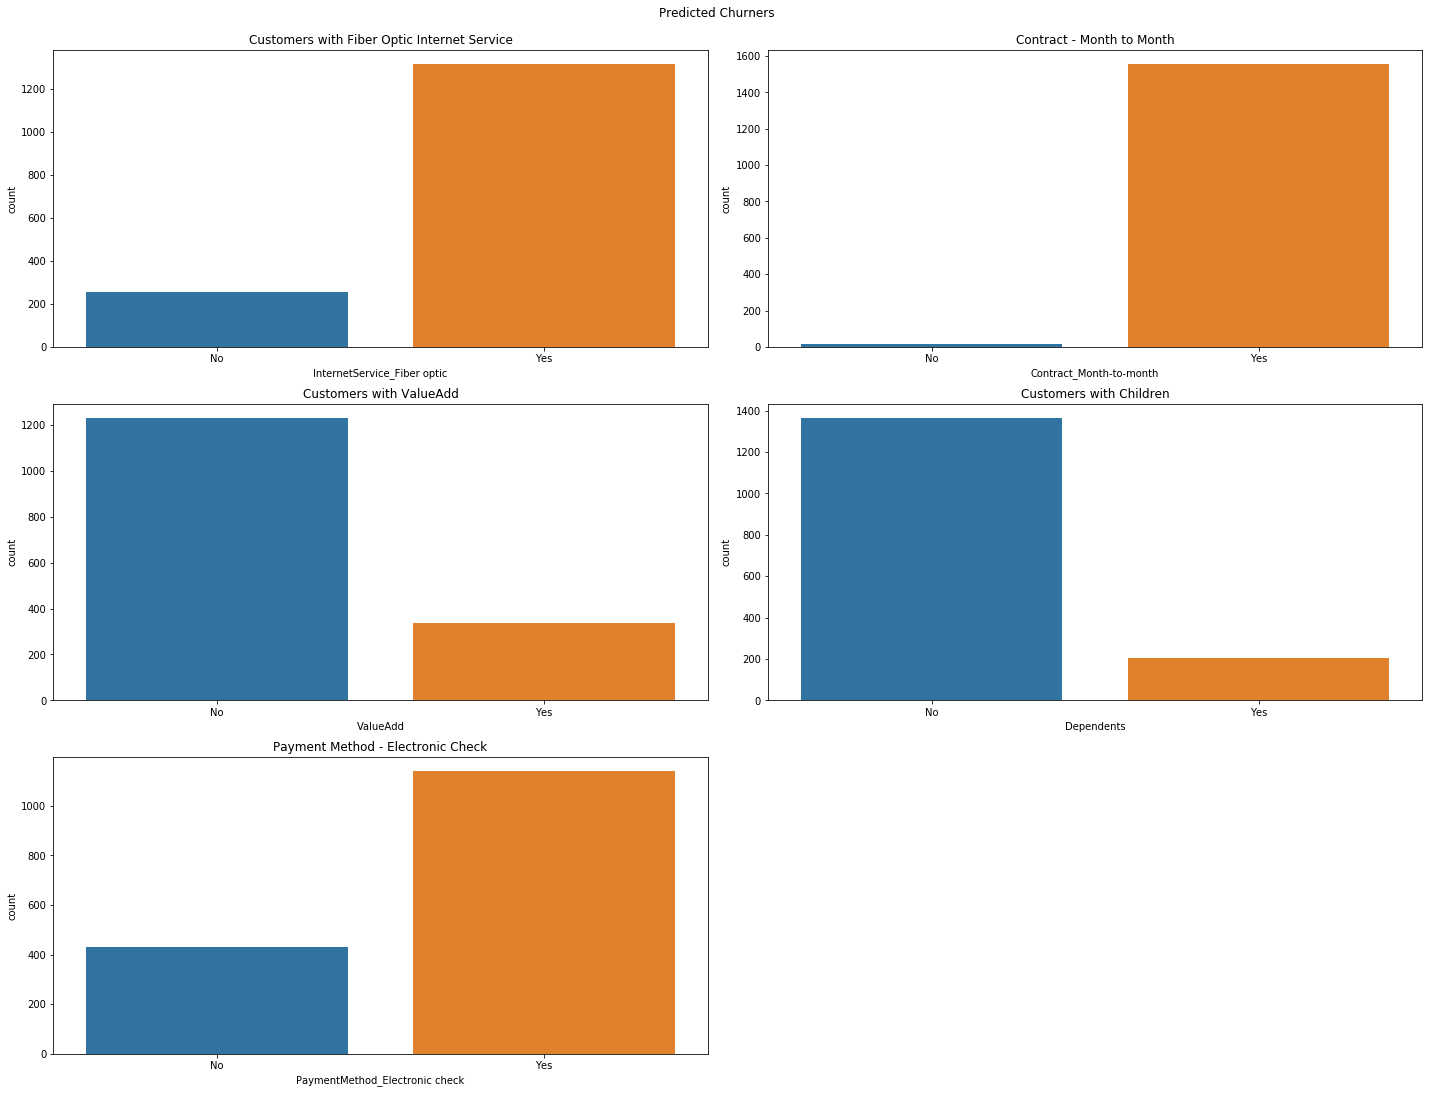

There are 1569 customers expected to leave the company.


In [32]:
plt.figure(figsize=(20,20))
plt.suptitle('Predicted Churners')

plt.subplot(4, 2, 1)
plt.title('Customers with Fiber Optic Internet Service')
sns.countplot(r['InternetService_Fiber optic']).set(xticklabels=['No','Yes'])

plt.subplot(4, 2, 2)
plt.title('Contract - Month to Month')
sns.countplot(r['Contract_Month-to-month']).set(xticklabels=['No','Yes'])

plt.subplot(4, 2, 3)
plt.title('Customers with ValueAdd')
sns.countplot(r.ValueAdd).set(xticklabels=['No','Yes'])

plt.subplot(4, 2, 4)
plt.title('Customers with Children')
sns.countplot(r.Dependents).set(xticklabels=['No','Yes'])

plt.subplot(4, 2, 5)
plt.title('Payment Method - Electronic Check')
sns.countplot(r['PaymentMethod_Electronic check']).set(xticklabels=['No','Yes'])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show();

print('There are {} customers expected to leave the company.'.format(r.shape[0]))

The charts above indicate the characteristics of those who were predicted to be churners. The churners have fiber optic internet service on a month-to-month contract, pay via electronic check, do not have children and do not take advantage of value added services.

__Customer Retention Strategy__

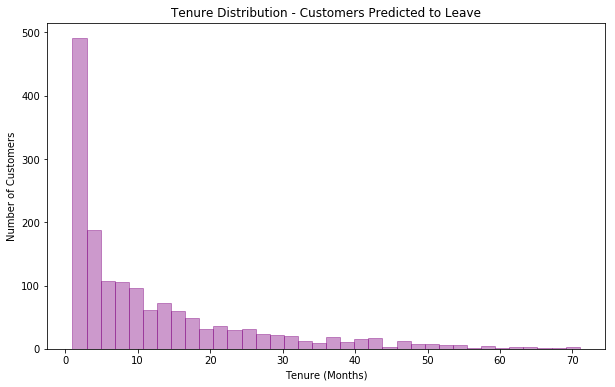

In [33]:
plt.figure(figsize=(10,6))
#plt.hist(data.tenure)
sns.distplot(r['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'purple'})

plt.title('Tenure Distribution - Customers Predicted to Leave')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show();

It's clear that the majority of customers are expected to leave within the year. Therefore, extensive attention needs to be paid to new customers until they've been with the company for at least a 12 months with bi-monthly check-ins with those most likely to leave. Once customers make it passed the first year, there are two key strategies the company needs to focus on: yearly contracts and value added services. This even means offering a discount on these services as long as it means locking in a customer.

# Conclusion

The data indicates that there are a number of features that are key indicators of churn, particularly contract type and payment method. Further, the data also alludes to the stickiness of value added services. Customers who take advantage of 3 or more value added services have a longer tenure on average than the overall average customer tenure. This is extremely important because the longer tenure also leads to additional revenue for the company. Even though this customer group appears to be important to the bottom line, when you account for membership of this group as a feature it does not affect the prediction. This means that customers will leave regardless of how many services they sign up for. The question then becomes "How can we get customers to stay longer?" instead of "How do we prevent customers from leaving?".

In general, the available data is sufficient enough to generate predictions with roughly 80% accuracy regardless of what model is chosen. However, more customer data is necessary in order to make better predictions. For example, one question the company is likely to ask is why so many customers leave within the first 12 months. One hypothesis is that customers move around a lot, which will affect retention rates. And, following up on that, would be research as to whether or not these customers come back after they move.